# Import libraries

In [196]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

# Load dataset

In [197]:
df = pd.read_csv("movieReplicationSet.csv")
df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


# Q1. Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? 

In [198]:
movies = df.iloc[:, :400]

pop_count = [] # to store index and count of ratings
for i in range(400):
    tmp_movie = movies.iloc[:, i].to_numpy()
    count = 0
    for ratings in tmp_movie:
        if ratings == ratings: # check if nan
            count += 1
            
    pop_count.append((i, count))

In [199]:
pop_median = np.median([i[1] for i in pop_count]) # calculate median count of ratings

# split the movies index based on popularity
pop_idx = [i[0] for i in pop_count if i[1] >= pop_median] 
unpop_idx = [i[0] for i in pop_count if i[1] < pop_median]

# calculate the median ratings for each movie in the two splits
pop_med = [np.median(movies.iloc[:, i].dropna()) for i in pop_idx]
unpop_med = [np.median(movies.iloc[:, i].dropna()) for i in unpop_idx]

print("Popular movies median ratings distribution")
print(pd.Series(pop_med).value_counts().sort_index(),"\n")

print("Unpopular movies median ratings distribution")
print(pd.Series(unpop_med).value_counts().sort_index(),"\n")

Popular movies median ratings distribution
2.50    37
3.00    93
3.25     1
3.50    68
4.00     1
dtype: int64 

Unpopular movies median ratings distribution
2.00     31
2.25      4
2.50    113
2.75      4
3.00     44
3.50      4
dtype: int64 



In [200]:
# MannWhitneyU test for Q1
_, p = scipy.stats.mannwhitneyu(pop_med, unpop_med, alternative = 'greater')

print('P Value:', p)

P Value: 9.929258851707232e-35


# TODO: Q2.Are movies that are newer rated differently than movies that are older?

In [201]:
# extract the release year of each movie from the title
title = movies.keys()
years_list = []
for i in range (0,400):
    years = title[i][-6:]
    years_mod = years.replace("(", "").replace(")", "")
    years_list.append(years_mod)

In [202]:
# get the median year
sorted_list = sorted(years_list)
n = len(sorted(years_list))
median = (int(sorted_list[n//2-1]) + int(sorted_list[n//2]))/2
median

1999.0

In [203]:
# split the movies into two groups: old and new
index_old = []
index_new = []
for j in range(0, len(years_list)):
    if int(years_list[j]) < median:
        index_old.append(j)
    else:
        index_new.append(j)

In [204]:
# we want to make sure the two groups have the same number of elements
diff = len(index_new) - len(index_old)
diff

6

In [205]:
# get indices in which element is equal to the median: 1999
indices = [i for i, element in enumerate(years_list) if element == '1999']
ind = indices[:3] # move diff/2 elements from the longer list to the shorter one

In [206]:
# the modified index lists
index_new = [element for element in index_new if element not in ind]
index_old.extend(ind)

In [207]:
# calculate the median ratings for each movie in the two splits
old_med = [np.median(movies.iloc[:, index_old].dropna()) for i in index_old]
new_med = [np.median(movies.iloc[:, index_new].dropna()) for i in index_new]
# do MannWhitneyU test 
_, p = scipy.stats.mannwhitneyu(old_med, new_med, alternative = 'two-sided')

print('P Value:', p)

P Value: 9.182598395744396e-89


# Q3. Is enjoyment of ‘Shrek (2001)’ gendered?

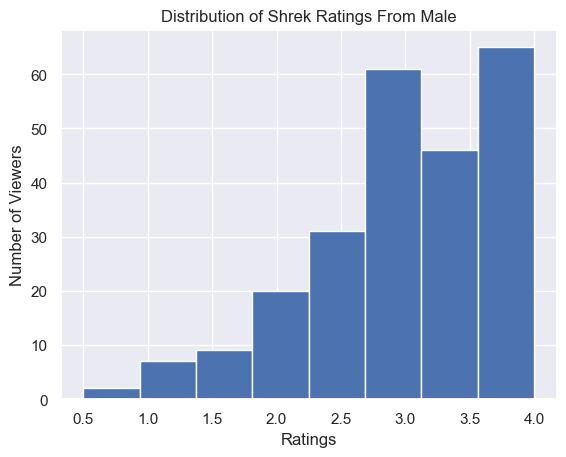

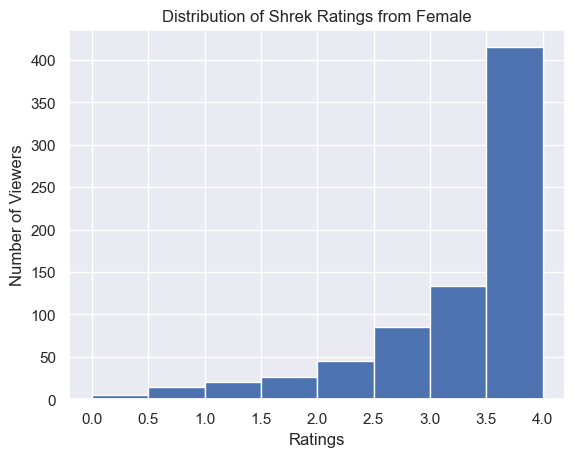

In [208]:
shrek = movies['Shrek (2001)']
gender = df.iloc[:, 474]
gender = gender[gender[:] != 3]

# split shrek ratings
shrek_male = shrek[gender[gender[:] == 2].index].dropna()
shrek_female = shrek[gender[gender[:] == 1].index].dropna()

# plot male and female shrek ratings 
plt.hist(shrek_male, bins = 8)
plt.title("Distribution of Shrek Ratings From Male")
plt.xlabel("Ratings")
plt.ylabel("Number of Viewers")
plt.show()

plt.hist(shrek_female, bins = 8)
plt.title("Distribution of Shrek Ratings from Female")
plt.xlabel("Ratings")
plt.ylabel("Number of Viewers")
plt.show()

In [209]:
# MannWhitneyU test for Q3
_, p = scipy.stats.mannwhitneyu(shrek_male, shrek_female, alternative = 'two-sided')

print('P Value:', p)

P Value: 0.050536625925559006


# TODO: Q4.What proportion of movies are rated differently by male and female viewers?

In [210]:
movies

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN


In [211]:
gender = df.iloc[:, 474]
gender = gender[gender[:] != 3]

proportion = []

# Iterate through each movie
for i in range(400):  
    
    # Create two groups: male and female viewers
    male_ratings = movies.iloc[:,i][gender[gender[:] == 2].index].dropna()
    female_ratings = movies.iloc[:,i][gender[gender[:] == 1].index].dropna()
    
    # Perform a Mann-Whitney U test
    _, p = scipy.stats.mannwhitneyu(male_ratings, female_ratings, alternative='two-sided')
    
    # Set the significance level
    alpha = 0.005 
    
    # Check if the null hypothesis is rejected
    if p < alpha:
        proportion.append(1)
    else:
        proportion.append(0)

# Calculate the proportion of movies rated differently
proportion_res = sum(proportion) / len(proportion)

print(f"Proportion of movies rated differently by male and female viewers: {proportion_res}")

Proportion of movies rated differently by male and female viewers: 0.125


# Q5. Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

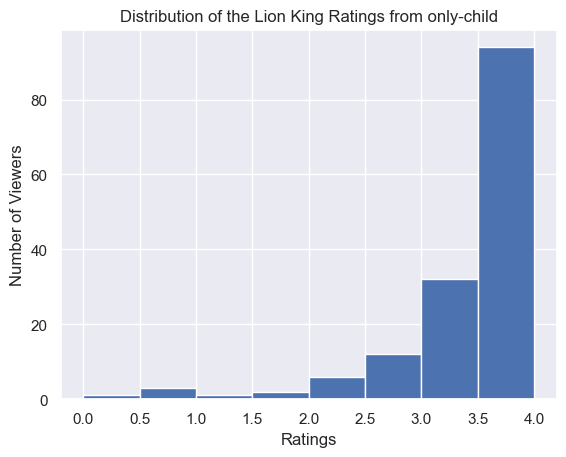

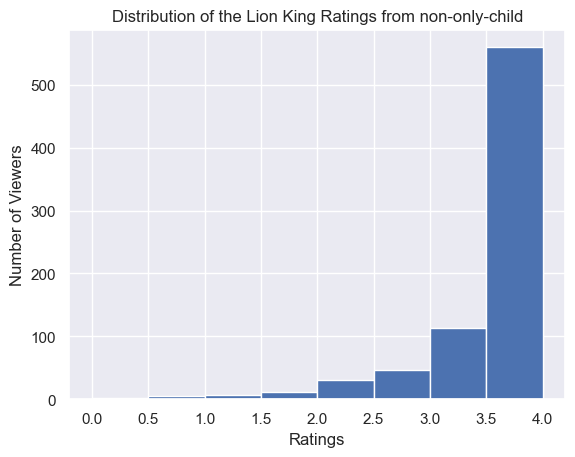

In [212]:
lion = movies['The Lion King (1994)']
child = df.iloc[:, 475]
child = child[child[:] != -1]

# split shrek ratings
lion_only = lion[child[child[:] == 1].index].dropna()
lion_notonly = lion[child[child[:] == 0].index].dropna()

# plot only child and non-only child lion king ratings 
plt.hist(lion_only, bins = 8)
plt.title("Distribution of the Lion King Ratings from only-child")
plt.xlabel("Ratings")
plt.ylabel("Number of Viewers")
plt.show()

plt.hist(lion_notonly, bins = 8)
plt.title("Distribution of the Lion King Ratings from non-only-child")
plt.xlabel("Ratings")
plt.ylabel("Number of Viewers")
plt.show()

In [213]:
# MannWhitneyU test for Q5
_, p = scipy.stats.mannwhitneyu(lion_only, lion_notonly, alternative = "greater")

print('P Value:', p)

P Value: 0.978419092554931


# TODO: Q6.  What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

In [214]:
child = df.iloc[:, 475]
child = child[child[:] != -1]

In [215]:
proportion = []

# Iterate through each movie
for i in range(400):  
    
    # Create two groups: with vs without siblings viewers
    only_ratings = movies.iloc[:,i][child[child[:] == 1].index].dropna()
    sib_ratings = movies.iloc[:,i][child[child[:] == 0].index].dropna()
    
    # Perform a Mann-Whitney U test
    _, p = scipy.stats.mannwhitneyu(only_ratings, sib_ratings, alternative='two-sided')
    
    # Set the significance level
    alpha = 0.005 
    
    # Check if the null hypothesis is rejected
    if p < alpha:
        proportion.append(1)
    else:
        proportion.append(0)

# Calculate the proportion of movies rated differently
proportion_res = sum(proportion) / len(proportion)

print(f"Proportion of movies rated differently by with vs without siblings: {proportion_res}")

Proportion of movies rated differently by with vs without siblings: 0.0175


# Q7.Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

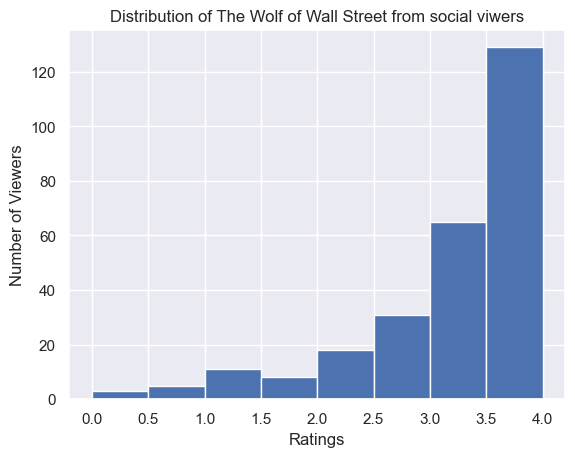

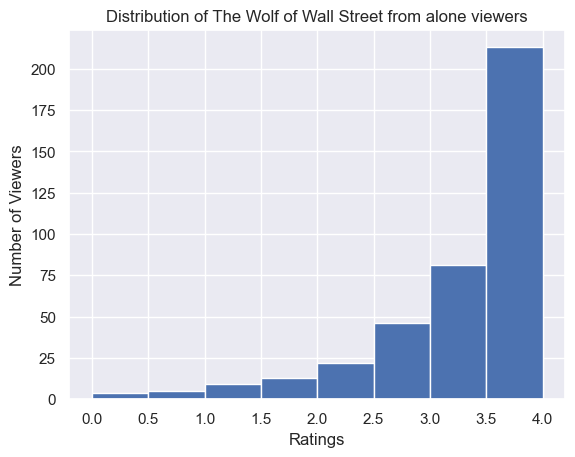

In [216]:
wolf = movies['The Wolf of Wall Street (2013)']
social = df.iloc[:, 476]
social = social[social[:] != -1]

# split shrek ratings
wolf_social = wolf[social[social[:] == 0].index].dropna()
wolf_alone = wolf[social[social[:] == 1].index].dropna()

# plot only child and non-only child lion king ratings 
plt.hist(wolf_social, bins = 8)
plt.title("Distribution of The Wolf of Wall Street from social viwers")
plt.xlabel("Ratings")
plt.ylabel("Number of Viewers")
plt.show()

plt.hist(wolf_alone, bins = 8)
plt.title("Distribution of The Wolf of Wall Street from alone viewers")
plt.xlabel("Ratings")
plt.ylabel("Number of Viewers")
plt.show()

In [217]:
# MannWhitneyU test for Q7
_, p = scipy.stats.mannwhitneyu(wolf_social, wolf_alone, alternative = 'greater')

print('P Value:', p)

P Value: 0.9436657996253056


# TODO: Q8. What proportion of movies exhibit such a “social watching” effect?

In [218]:
social = df.iloc[:, 476]
social = social[social[:] != -1]

In [219]:
social

0       1
1       0
2       0
3       1
4       1
       ..
1092    0
1093    0
1094    0
1095    1
1096    1
Name: Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond), Length: 1072, dtype: int64

In [220]:
proportion = []

# Iterate through each movie
for i in range(400):  
    
    # Create two groups: watch with people vs. watch alone
    social_group = movies.iloc[:,i][social[social[:] == 0].index].dropna()
    alone = movies.iloc[:,i][social[social[:] == 1].index].dropna()
    
    # Perform a Mann-Whitney U test
    _, p = scipy.stats.mannwhitneyu(social_group, alone, alternative='two-sided')
    
    # Set the significance level
    alpha = 0.005 
    
    # Check if the null hypothesis is rejected
    if p < alpha:
        proportion.append(1)
    else:
        proportion.append(0)

# Calculate the proportion of movies rated differently
proportion_res = sum(proportion) / len(proportion)

print(f"Proportion of movies rated differently by either watching alone or not: {proportion_res}")

Proportion of movies rated differently by either watching alone or not: 0.025


# Q9. Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’? 

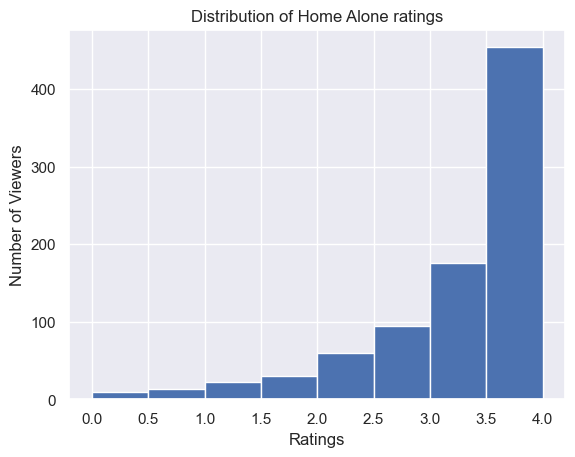

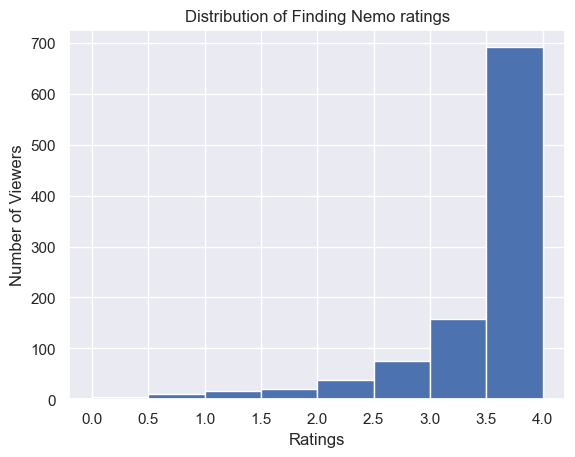

In [221]:
home_alone = movies['Home Alone (1990)'].dropna().to_numpy()
finding_nemo = movies['Finding Nemo (2003)'].dropna().to_numpy()

# plot ratings 
plt.hist(home_alone, bins = 8)
plt.title("Distribution of Home Alone ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Viewers")
plt.show()

plt.hist(finding_nemo, bins = 8)
plt.title("Distribution of Finding Nemo ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Viewers")
plt.show()

In [222]:
_, p_val_q9 = scipy.stats.ks_2samp(home_alone, finding_nemo)

print("KS Test P Value:", p_val_q9)

KS Test P Value: 6.379397182836346e-10


# TODO: Q10.There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘IndianaJones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers?

## star wars

In [223]:
star_wars = movies.filter(like = 'Star Wars')
star_wars

,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode II - Attack of the Clones (2002),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode 1 - The Phantom Menace (1999),Star Wars: Episode VII - The Force Awakens (2015),Star Wars: Episode VI - The Return of the Jedi (1983)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,0.0,4.0,0.0,2.5,4.0
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1092,4.0,3.0,4.0,NaN,4.0,4.0
1093,4.0,3.0,3.5,4.0,4.0,4.0
1094,3.0,1.5,3.0,2.5,4.0,4.0
1095,NaN,4.0,4.0,4.0,NaN,4.0


In [235]:
group1 = star_wars['Star Wars: Episode IV - A New Hope (1977)'].dropna().to_numpy()
group2 = star_wars['Star Wars: Episode II - Attack of the Clones (2002)'].dropna().to_numpy()
group3 = star_wars['Star Wars: Episode V - The Empire Strikes Back (1980)'].dropna().to_numpy()
group4 = star_wars['Star Wars: Episode 1 - The Phantom Menace (1999)'].dropna().to_numpy()
group5 = star_wars['Star Wars: Episode VII - The Force Awakens (2015)'].dropna().to_numpy()
group6 = star_wars['Star Wars: Episode VI - The Return of the Jedi (1983)'].dropna().to_numpy()
# Perform the Kruskal-Wallis test
H, p = scipy.stats.kruskal(group1, group2, group3, group4, group5, group6)
print('p value is: ', p)

p value is:  8.01647736660335e-48


## Harry Potter

In [236]:
hp = movies.filter(like = 'Harry Potter')
hp

,Harry Potter and the Sorcerer's Stone (2001),Harry Potter and the Deathly Hallows: Part 2 (2011),Harry Potter and the Goblet of Fire (2005),Harry Potter and the Chamber of Secrets (2002)
0,NaN,NaN,0.0,0.5
1,4.0,NaN,NaN,4.0
2,4.0,3.5,4.0,3.5
3,2.0,2.0,2.5,2.5
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1092,4.0,4.0,4.0,4.0
1093,4.0,4.0,3.5,3.5
1094,3.5,4.0,3.0,4.0
1095,3.0,NaN,3.0,2.5


In [238]:
group1 = hp["Harry Potter and the Sorcerer's Stone (2001)"].dropna().to_numpy()
group2 = hp["Harry Potter and the Deathly Hallows: Part 2 (2011)"].dropna().to_numpy()
group3 = hp["Harry Potter and the Goblet of Fire (2005)"].dropna().to_numpy()
group4 = hp["Harry Potter and the Chamber of Secrets (2002)"].dropna().to_numpy()
# Perform the Kruskal-Wallis test
H, p = scipy.stats.kruskal(group1, group2, group3, group4)
print('p value is: ', p)

p value is:  0.34331950837289205


## The Matrix

In [239]:
the_matrix = movies.filter(like = 'The Matrix')
the_matrix

,The Matrix Revolutions (2003),The Matrix Reloaded (2003),The Matrix (1999)
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,2.5,NaN
...,...,...,...
1092,NaN,NaN,3.5
1093,4.0,3.5,3.5
1094,NaN,NaN,NaN
1095,NaN,NaN,NaN


In [240]:
group1 = the_matrix["The Matrix Revolutions (2003)"].dropna().to_numpy()
group2 = the_matrix["The Matrix Reloaded (2003)"].dropna().to_numpy()
group3 = the_matrix["The Matrix (1999)"].dropna().to_numpy()
# Perform the Kruskal-Wallis test
H, p = scipy.stats.kruskal(group1, group2, group3)
print('p value is: ', p)

p value is:  3.1236517880781424e-11


## Indiana Jones

In [241]:
ij = movies.filter(like = 'Indiana Jones')
ij

,Indiana Jones and the Last Crusade (1989),Indiana Jones and the Temple of Doom (1984),Indiana Jones and the Raiders of the Lost Ark (1981),Indiana Jones and the Kingdom of the Crystal Skull (2008)
0,3.0,4.0,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,3.0,2.5,2.5,1.5
4,0.5,0.5,NaN,NaN
...,...,...,...,...
1092,3.5,3.5,3.5,3.5
1093,4.0,4.0,NaN,3.5
1094,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN


In [242]:
group1 = ij["Indiana Jones and the Last Crusade (1989)"].dropna().to_numpy()
group2 = ij["Indiana Jones and the Temple of Doom (1984)"].dropna().to_numpy()
group3 = ij["Indiana Jones and the Raiders of the Lost Ark (1981)"].dropna().to_numpy()
group4 = ij["Indiana Jones and the Kingdom of the Crystal Skull (2008)"].dropna().to_numpy()
# Perform the Kruskal-Wallis test
H, p = scipy.stats.kruskal(group1, group2, group3, group4)
print('p value is: ', p)

p value is:  6.27277563979608e-10


## Jurassic Park

In [243]:
jp = movies.filter(like = 'Jurassic Park')
jp

,The Lost World: Jurassic Park (1997),Jurassic Park III (2001),Jurassic Park (1993)
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,2.5,NaN,NaN
3,NaN,NaN,2.5
4,NaN,NaN,NaN
...,...,...,...
1092,2.5,NaN,2.5
1093,3.5,4.0,3.0
1094,NaN,NaN,NaN
1095,NaN,NaN,NaN


In [244]:
group1 = jp["The Lost World: Jurassic Park (1997)"].dropna().to_numpy()
group2 = jp["Jurassic Park III (2001)"].dropna().to_numpy()
group3 = jp["Jurassic Park (1993)"].dropna().to_numpy()
# Perform the Kruskal-Wallis test
H, p = scipy.stats.kruskal(group1, group2, group3)
print('p value is: ', p)

p value is:  7.636930084362221e-11


## Pirates of the Caribbean

In [245]:
pirates = movies.filter(like = 'Pirates of the Caribbean')
pirates

,Pirates of the Caribbean: Dead Man's Chest (2006),Pirates of the Caribbean: At World's End (2007),Pirates of the Caribbean: The Curse of the Black Pearl (2003)
0,0.5,1.0,NaN
1,1.5,NaN,NaN
2,3.0,NaN,NaN
3,2.0,1.0,3.0
4,2.0,3.0,3.0
...,...,...,...
1092,NaN,NaN,NaN
1093,3.5,3.5,3.5
1094,2.5,3.5,4.0
1095,NaN,NaN,NaN


In [246]:
group1 = pirates["Pirates of the Caribbean: Dead Man's Chest (2006)"].dropna().to_numpy()
group2 = pirates["Pirates of the Caribbean: At World's End (2007)"].dropna().to_numpy()
group3 = pirates["Pirates of the Caribbean: The Curse of the Black Pearl (2003)"].dropna().to_numpy()
# Perform the Kruskal-Wallis test
H, p = scipy.stats.kruskal(group1, group2, group3)
print('p value is: ', p)

p value is:  3.2901287079094474e-05


## Toy Story

In [247]:
ts = movies.filter(like = 'Toy Story')
ts

,Toy Story 2 (1999),Toy Story 3 (2010),Toy Story (1995)
0,3.0,3.0,4.0
1,1.0,4.0,3.0
2,NaN,3.5,NaN
3,3.0,3.0,3.0
4,2.5,NaN,2.5
...,...,...,...
1092,3.5,4.0,4.0
1093,3.5,4.0,3.5
1094,3.0,3.5,3.0
1095,2.5,3.5,3.0


In [248]:
group1 = ts["Toy Story 2 (1999)"].dropna().to_numpy()
group2 = ts["Toy Story 3 (2010)"].dropna().to_numpy()
group3 = ts["Toy Story (1995)"].dropna().to_numpy()
# Perform the Kruskal-Wallis test
H, p = scipy.stats.kruskal(group1, group2, group3)
print('p value is: ', p)

p value is:  5.065805156537524e-06


## Batman

In [249]:
batman = movies.filter(like = 'Batman')
batman

,Batman & Robin (1997),Batman (1989),Batman: The Dark Knight (2008)
0,NaN,NaN,2.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,3.0
4,0.5,1.0,2.5
...,...,...,...
1092,NaN,NaN,NaN
1093,3.0,3.5,4.0
1094,NaN,3.0,3.5
1095,NaN,NaN,NaN


In [250]:
group1 = batman["Batman & Robin (1997)"].dropna().to_numpy()
group2 = batman["Batman (1989)"].dropna().to_numpy()
group3 = batman["Batman: The Dark Knight (2008)"].dropna().to_numpy()
# Perform the Kruskal-Wallis test
H, p = scipy.stats.kruskal(group1, group2, group3)
print('p value is: ', p)

p value is:  4.2252969509030006e-42


Note that the significance level we choose is 0.005. Then if the p value is smaller than 0.005, we say that there are significant differences between groups, which also refers to inconsistent quality. 7 out of the above 8 franchises are of inconsistent qualty, as experienced by viewers.

# Extra Credit: Tell us something interesting and true (supported by a significance test of some kind) about the movies in this dataset that is not already covered by the questions above.

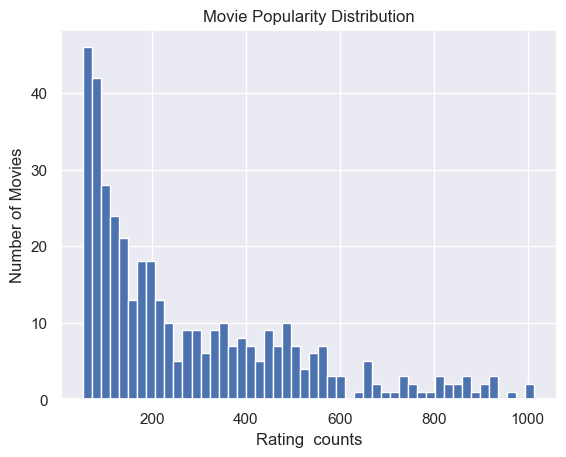

The skewness of the movie popularity distribution: 1.2109891580506078
Movie popularity is not normally distributed. In fact, it is extremely positively skewed. (i.e. most of the movies are not watched by most of the people)


In [50]:
pop_count = [] # to store index and count of ratings
for i in range(400):
    tmp_movie = movies.iloc[:, i].to_numpy()
    count = 0
    for ratings in tmp_movie:
        if ratings == ratings: # check if nan
            count += 1
            
    pop_count.append((i, count))

# plot the distribution of rating counts
plt.hist([i[1] for i in pop_count], bins = 50)
plt.title("Movie Popularity Distribution")
plt.xlabel("Rating  counts")
plt.ylabel("Number of Movies")
plt.show()
skewness = scipy.stats.skew([i[1] for i in pop_count])
print(f'The skewness of the movie popularity distribution: {skewness}')
print("Movie popularity is not normally distributed. In fact, it is extremely positively skewed. (i.e. most of the movies are not watched by most of the people)")